In [5]:
!pip install pywavelets
!pip install scikit-image
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data
from skimage.data import camera
from skimage.util import random_noise
from skimage import img_as_ubyte


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [8]:
print(pywt.wavelist())

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

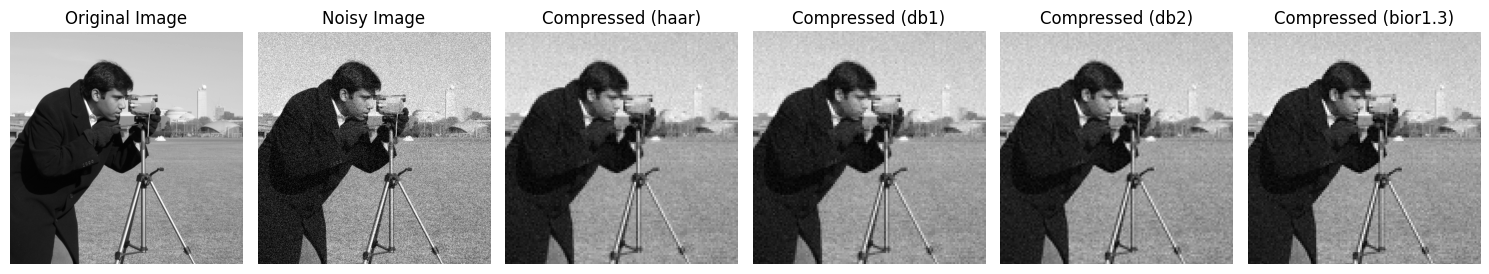

In [14]:
import os
import cv2
# Function to perform 2D DWT and image compression
def dwt_compression(image, wavelet_name, threshold):
    # Perform 2D Discrete Wavelet Transform
    coeffs2 = pywt.wavedec2(image, wavelet_name, level=2)
    
    # Apply thresholding to the detail coefficients
    coeffs2_thresh = [coeffs2[0]]  # Approximation coefficients remain unchanged
    for detail_level in coeffs2[1:]:
        cH, cV, cD = detail_level
        cH_thresh = pywt.threshold(cH, threshold, mode='soft')
        cV_thresh = pywt.threshold(cV, threshold, mode='soft')
        cD_thresh = pywt.threshold(cD, threshold, mode='soft')
        coeffs2_thresh.append((cH_thresh, cV_thresh, cD_thresh))
    
    # Reconstruct the image using Inverse Discrete Wavelet Transform
    compressed_image = pywt.waverec2(coeffs2_thresh, wavelet_name)
    
    return compressed_image

# Load an example image
image = camera()


# Add Gaussian noise for visualization purposes
sigma = 0.1
noisy_image = random_noise(image, mode='gaussian', var=sigma**2)

# List of wavelets to be used
wavelets = ['haar', 'db1', 'db2', 'bior1.3']
# Set a threshold for compression
threshold = 20

# Plot original, noisy, and compressed images
fig, axes = plt.subplots(1, len(wavelets) + 2, figsize=(15, 5))

# Original image
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Noisy image
axes[1].imshow(noisy_image, cmap=plt.cm.gray)
axes[1].set_title('Noisy Image')
axes[1].axis('off')


# Compressed images with different wavelets
for i, wavelet in enumerate(wavelets, start=2):
    compressed_image = dwt_compression(noisy_image, wavelet, threshold)
    compressed_image = np.clip(compressed_image, 0, 1)
    compressed_image_uint8 = img_as_ubyte(compressed_image)

    axes[i].imshow(compressed_image, cmap=plt.cm.gray)
    axes[i].set_title(f'Compressed ({wavelet})')
    axes[i].axis('off')

    cv2.imwrite(f'compressed_{wavelet}.jpg', compressed_image_uint8)
    
noisy_image = np.clip(noisy_image, 0, 1)
noisy_image_uint8 = img_as_ubyte(noisy_image)
cv2.imwrite(f'noisy.jpeg', noisy_image_uint8)
plt.tight_layout()
plt.show()

In [15]:
path = {'compressed_haar': 'C:/romena/unige/wavelet_compression/compressed_haar.jpg', 'compressed_db1': 'C:/romena/unige/wavelet_compression/compressed_db1.jpg', 'compressed_db2': 'C:/romena/unige/wavelet_compression/compressed_db2.jpg', 'compressed_bior1.3': 'C:/romena/unige/wavelet_compression/compressed_bior1.3.jpg', 'noisy': 'C:/romena/unige/wavelet_compression/noisy.jpeg'}
for i in path:
  size_img= os.path.getsize(path[i])
  size_img= size_img/1024
  print(i +'='+ str(size_img) + 'KB')
  size_img= 0
  



compressed_haar=71.9599609375KB
compressed_db1=71.9599609375KB
compressed_db2=78.408203125KB
compressed_bior1.3=92.5029296875KB
noisy=181.0810546875KB


In [16]:
import os
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.data import camera
from skimage.util import random_noise

C:\Users\rmnas\AppData\Local\Temp\ipykernel_11492\1451890406.py:70: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_value = psnr(image, compressed_image)


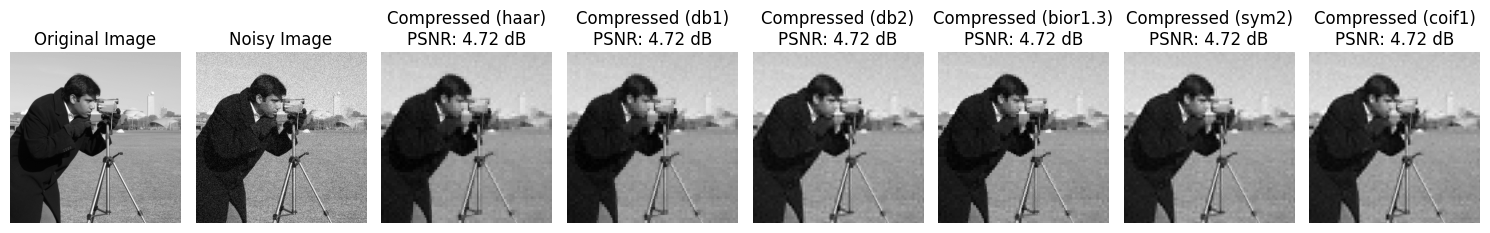

Wavelet: haar, PSNR: 4.72 dB
Wavelet: db1, PSNR: 4.72 dB
Wavelet: db2, PSNR: 4.72 dB
Wavelet: bior1.3, PSNR: 4.72 dB
Wavelet: sym2, PSNR: 4.72 dB
Wavelet: coif1, PSNR: 4.72 dB


In [20]:
import os
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.data import camera
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr

# Function to perform 2D DWT and image compression with adaptive thresholding
def advanced_dwt_compression(image, wavelet_name, level=2):
    # Perform 2D Discrete Wavelet Transform
    coeffs2 = pywt.wavedec2(image, wavelet_name, level=level)
    
    # Calculate the median absolute deviation (MAD) to set adaptive thresholds
    def mad(arr):
        return np.median(np.abs(arr - np.median(arr)))

    sigma = mad(coeffs2[-1][0]) / 0.6745  # Estimate noise standard deviation
    uthresh = sigma * np.sqrt(2 * np.log(image.size))
    
    # Apply thresholding to the detail coefficients
    coeffs2_thresh = [coeffs2[0]]  # Approximation coefficients remain unchanged
    for detail_level in coeffs2[1:]:
        cH, cV, cD = detail_level
        cH_thresh = pywt.threshold(cH, uthresh, mode='soft')
        cV_thresh = pywt.threshold(cV, uthresh, mode='soft')
        cD_thresh = pywt.threshold(cD, uthresh, mode='soft')
        coeffs2_thresh.append((cH_thresh, cV_thresh, cD_thresh))
    
    # Reconstruct the image using Inverse Discrete Wavelet Transform
    compressed_image = pywt.waverec2(coeffs2_thresh, wavelet_name)
    
    return compressed_image

# Load an example image
image = camera()

# Add Gaussian noise for visualization purposes
sigma = 0.1
noisy_image = random_noise(image, mode='gaussian', var=sigma**2)

# List of wavelets to be used
wavelets = ['haar', 'db1', 'db2', 'bior1.3', 'sym2', 'coif1']
# Set a level for decomposition
level = 3

# Plot original, noisy, and compressed images
fig, axes = plt.subplots(1, len(wavelets) + 2, figsize=(15, 5))

# Original image
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Noisy image
axes[1].imshow(noisy_image, cmap=plt.cm.gray)
axes[1].set_title('Noisy Image')
axes[1].axis('off')

# Compressed images with different wavelets and calculate PSNR
psnr_values = []
for i, wavelet in enumerate(wavelets, start=2):
    compressed_image = advanced_dwt_compression(noisy_image, wavelet, level)
    compressed_image = np.clip(compressed_image, 0, 1)
    compressed_image_uint8 = img_as_ubyte(compressed_image)

    # Calculate PSNR
    psnr_value = psnr(image, compressed_image)
    psnr_values.append((wavelet, psnr_value))

    axes[i].imshow(compressed_image, cmap=plt.cm.gray)
    axes[i].set_title(f'Compressed ({wavelet})\nPSNR: {psnr_value:.2f} dB')
    axes[i].axis('off')

    cv2.imwrite(f'compressed_{wavelet}.jpg', compressed_image_uint8)

# Save noisy image
noisy_image = np.clip(noisy_image, 0, 1)
noisy_image_uint8 = img_as_ubyte(noisy_image)
cv2.imwrite(f'noisy.jpeg', noisy_image_uint8)

plt.tight_layout()
plt.show()

# Print PSNR values for comparison
for wavelet, psnr_value in psnr_values:
    print(f'Wavelet: {wavelet}, PSNR: {psnr_value:.2f} dB')
